In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def random_sine_wave(x_start, x_end, num_points, y_start=None, y_end=None, amplitude_range=(0.5, 1.5), phase_range=(0, 2*np.pi)):
    # Generate x values
    x = np.linspace(x_start, x_end, num_points)
    
    # Generate random amplitude and phase
    amplitude = np.random.uniform(*amplitude_range)
    phase = np.random.uniform(*phase_range)
    
    # Generate base sine wave
    y = amplitude * np.sin(x + phase)
    
    # Adjust to meet start/end conditions
    if y_start is not None:
        y = y - y[0] + y_start
    elif y_end is not None:
        y = y - y[-1] + y_end
    
    return x, y

# Example usage
x_start, x_end = 0, 10
num_points = 100
y_start = 0.5  # Uncomment to specify start point
# y_end = -0.5  # Uncomment to specify end point

x, y = random_sine_wave(x_start, x_end, num_points, y_start=y_start)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Random Sine Wave')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noise(size, mean=0, std_dev=1):
    """
    Generate Gaussian noise.
    
    Parameters:
    size (tuple): Shape of the noise array
    mean (float): Mean of the Gaussian distribution
    std_dev (float): Standard deviation of the Gaussian distribution
    
    Returns:
    ndarray: Array of noise values
    """
    return np.random.normal(mean, std_dev, size)

# Generate noise
noise = generate_noise((100, 100))

# Visualize the noise
# visualize_noise(noise)

In [20]:
noise = noise.flatten()

In [ ]:
plt.plot(noise[:10])

# Add labels and title
plt.title('Line Graph of NumPy Array')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise1 = PerlinNoise(octaves=3)
noise2 = PerlinNoise(octaves=6)
noise3 = PerlinNoise(octaves=12)
noise4 = PerlinNoise(octaves=24)

xpix, ypix = 100, 100
pic = np.array()
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise1([i/xpix, j/ypix])
        noise_val += 0.5 * noise2([i/xpix, j/ypix])
        noise_val += 0.25 * noise3([i/xpix, j/ypix])
        noise_val += 0.125 * noise4([i/xpix, j/ypix])

        row.append(noise_val)
    pic.append(row)

# plt.imshow(pic, cmap='gray')
# plt.show()

In [ ]:
len(pic)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noise(size, mean=0, std_dev=1):
    """
    Generate Gaussian noise.
    Parameters:
    size (tuple): Shape of the noise array
    mean (float): Mean of the Gaussian distribution
    std_dev (float): Standard deviation of the Gaussian distribution
    Returns:
    ndarray: Array of noise values
    """
    return np.random.normal(mean, std_dev, size)

def gaussian_kernel(size, sigma=1):
    """
    Generate a 2D Gaussian kernel.
    Parameters:
    size (int): The size of the kernel (size x size)
    sigma (float): Standard deviation of the Gaussian distribution
    Returns:
    ndarray: 2D Gaussian kernel
    """
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

def convolve2d(image, kernel):
    """
    Perform 2D convolution between an image and a kernel.
    Parameters:
    image (ndarray): Input 2D image
    kernel (ndarray): 2D convolution kernel
    Returns:
    ndarray: Result of 2D convolution
    """
    i_height, i_width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    
    padded = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    output = np.zeros_like(image)
    
    for i in range(i_height):
        for j in range(i_width):
            output[i, j] = np.sum(padded[i:i+k_height, j:j+k_width] * kernel)
    
    return output

def smooth_noise(noise, kernel_size=5, sigma=1):
    """
    Apply Gaussian smoothing to the noise.
    Parameters:
    noise (ndarray): Input noise array
    kernel_size (int): Size of the Gaussian kernel
    sigma (float): Standard deviation for Gaussian kernel
    Returns:
    ndarray: Smoothed noise array
    """
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolve2d(noise, kernel)

def visualize_noise(noise, title):
    plt.imshow(noise, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Generate noise
noise = generate_noise((100, 100))

# Apply smoothing
smooth_noise_result = smooth_noise(noise, kernel_size=5, sigma=1)

# Visualize the original and smoothed noise
visualize_noise(noise, "Original Noise")
visualize_noise(smooth_noise_result, "Smoothed Noise")

In [ ]:
plt.plot(noise.flatten()[:10])

# Add labels and title
plt.title('Line Graph of NumPy Array')

# Display the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_perlin_noise_1d(size, octaves=1, persistence=0.5, lacunarity=2.0):
    noise = np.zeros(size)
    frequency = 1
    amplitude = 1
    max_value = 0

    for _ in range(octaves):
        noise += amplitude * np.interp(np.arange(size) * frequency / size,
                                       np.arange(size + 1),
                                       np.random.rand(size + 1))
        max_value += amplitude
        amplitude *= persistence
        frequency *= lacunarity

    return noise / max_value

def merge_octaves(size, octaves, strengths):
    merged_noise = np.zeros(size)
    for octave, strength in zip(octaves, strengths):
        merged_noise += strength * generate_perlin_noise_1d(size, octave)
    return merged_noise

# Example usage
size = 1000**2
octaves = [1, 3, 5]
strengths = [0.3, 0.3, 0.4]
np.random.seed(20)
merged_noise = merge_octaves(size, octaves, strengths)

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(merged_noise)
plt.title("1D Perlin Noise")
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()

MY TEST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_perlin_noise_1d(
    size, octaves=1, persistence=0.5, lacunarity=2.0, seed=None
):
    if seed is not None:
        np.random.seed(seed)

    noise = np.zeros(size)
    frequency = 1
    amplitude = 1
    max_value = 0

    for _ in range(octaves):
        noise += amplitude * np.interp(
            np.arange(size) * frequency / size,
            np.arange(size + 1),
            np.random.rand(size + 1),
        )
        max_value += amplitude
        amplitude *= persistence
        frequency *= lacunarity

    return noise / max_value


def generate_chunk(chunk_size, x_offset, octaves, strengths, seed=None):
    # Generate a chunk with some overlap for seamless stitching
    overlap = chunk_size // 4
    extended_size = chunk_size + 2 * overlap

    chunk_noise = np.zeros(extended_size)
    for octave, strength in zip(octaves, strengths):
        chunk_seed = seed + octave if seed is not None else None
        chunk_noise += strength * generate_perlin_noise_1d(
            extended_size, octave, seed=chunk_seed
        )

    # Only return the actual chunk size, discarding the overlap
    return chunk_noise[overlap:-overlap]


def generate_world(world_size, chunk_size, octaves, strengths, seed=None):
    num_chunks = (world_size + chunk_size - 1) // chunk_size
    world = np.zeros(world_size)

    for i in range(num_chunks):
        seed +=1
        x_offset = i * chunk_size
        chunk = generate_chunk(chunk_size, x_offset, octaves, strengths, seed)
        chunk_end = min(x_offset + chunk_size, world_size)
        world[x_offset:chunk_end] = chunk[: chunk_end - x_offset]

    return world


# Example usage
world_size = 1000
chunk_size = 32
octaves = [ 3]
strengths = [0.1]
seed = 42

# Generate the world
world = generate_world(world_size, chunk_size, octaves, strengths, seed)

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(world)
plt.title("Chunked Perlin Noise Terrain")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise1 = PerlinNoise(octaves=1)
noise2 = PerlinNoise(octaves=3)
noise3 = PerlinNoise(octaves=6)
noise4 = PerlinNoise(octaves=12)

xpix, ypix = 100, 10
lim_x, lim_y = 4, 6
tile_sizes = (2, 3)
pic = []
for i in range(ypix):
    row = []
    for j in range(xpix):
        noise_val = noise1([lim_x * i / xpix, lim_y * j / ypix], tile_sizes)
        noise_val += 0.5 * noise2([lim_x * i / xpix, lim_y * j / ypix], tile_sizes)
        noise_val += 0.25 * noise3([lim_x * i / xpix, lim_y * j / ypix], tile_sizes)
        noise_val += 0.125 * noise4([lim_x * i / xpix, lim_y * j / ypix], tile_sizes)

        row.append(noise_val)
    pic.extend(row)

plt.figure(figsize=(12, 6))
plt.plot(pic)
plt.title("Chunked Perlin Noise Terrain")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise1 = PerlinNoise(octaves=3)
noise2 = PerlinNoise(octaves=6)
noise3 = PerlinNoise(octaves=12)
noise4 = PerlinNoise(octaves=24)

xpix, ypix = 100, 100
pic = []
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise1([i / xpix, j / ypix])
        noise_val += 0.5 * noise2([i / xpix, j / ypix])
        noise_val += 0.25 * noise3([i / xpix, j / ypix])
        noise_val += 0.125 * noise4([i / xpix, j / ypix])

        row.append(noise_val)
    pic.append(row)

plt.imshow(pic, cmap="gray")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(pic)
plt.title("Chunked Perlin Noise Terrain")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [ ]:
import perlin2
p = perlin2.Perlin(6789)
print(p.one(2))  # 1D, 0 is the X value
print(p.two(0, 1))  # 2D, 0 is the X value and 1 is the Y value
print(p.three(0, 1, 2))  # 3D,  0 is the X value, 1 is the Y value, 2 is the Z value

print(p.one_octave(0))

In [28]:
x = []
for i in range(10000):
    x.append(p.one_octave(i))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x)
plt.title("Chunked Perlin Noise Terrain")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [ ]:
import perlin2
import matplotlib.pyplot as plt

p = perlin2.Perlin(6789)

x1 = []
x2 = []
for i in range(1000):
    x1.append(p.two_octave(i,1))
    x2.append(p.fade(p.one_octave(i)))
plt.figure(figsize=(12, 6))
plt.plot(x2)
plt.title("Chunked Perlin Noise Terrain")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

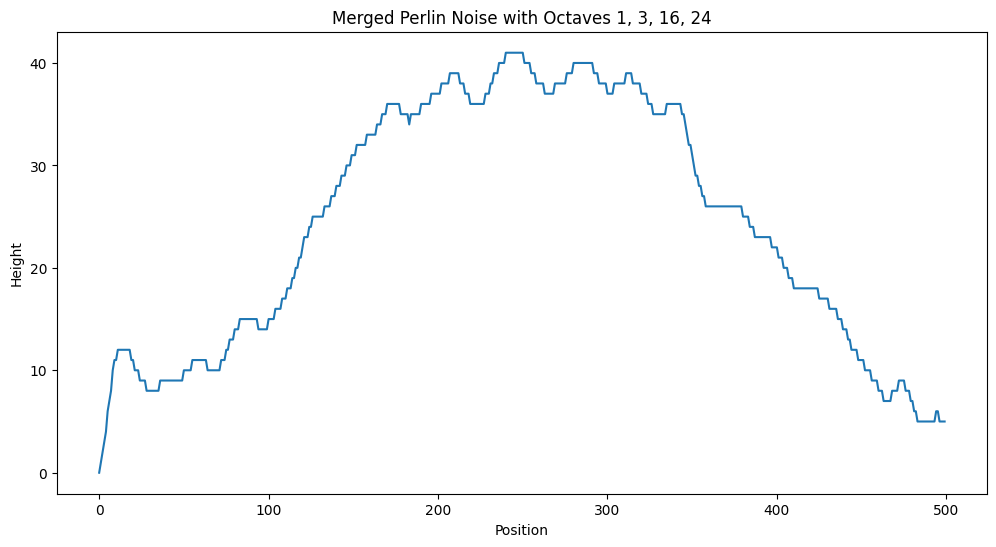

In [22]:
import perlin
import matplotlib.pyplot as plt

# Initialize Perlin noise generator
p = perlin.Perlin(6789)

# Prepare an empty list to store the merged noise values
x = []
merge_ratio = [1,0.2,0.3,0.4]
# Generate noise by combining octaves 1, 3, 16, and 24 with respective weights
for i in range(500):
    
    noise_val = merge_ratio[0] * p.one_octave(i,1,1000)  # Octave 1 with weight 0.4
    # noise_val += merge_ratio[1] * p.one_octave(i, 32,3)  # Octave 3 with weight 0.3
    # noise_val += merge_ratio[2] * p.one_octave(i, 32,16)  # Octave 16 with weight 0.2
    # noise_val += merge_ratio[3] * p.one_octave(i, 32,24)  # Octave 24 with weight 0.1

    x.append(noise_val)  # Append the merged noise value to the list

# Plot the resulting noise map
plt.figure(figsize=(12, 6))
plt.plot(x)
plt.title("Merged Perlin Noise with Octaves 1, 3, 16, 24")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

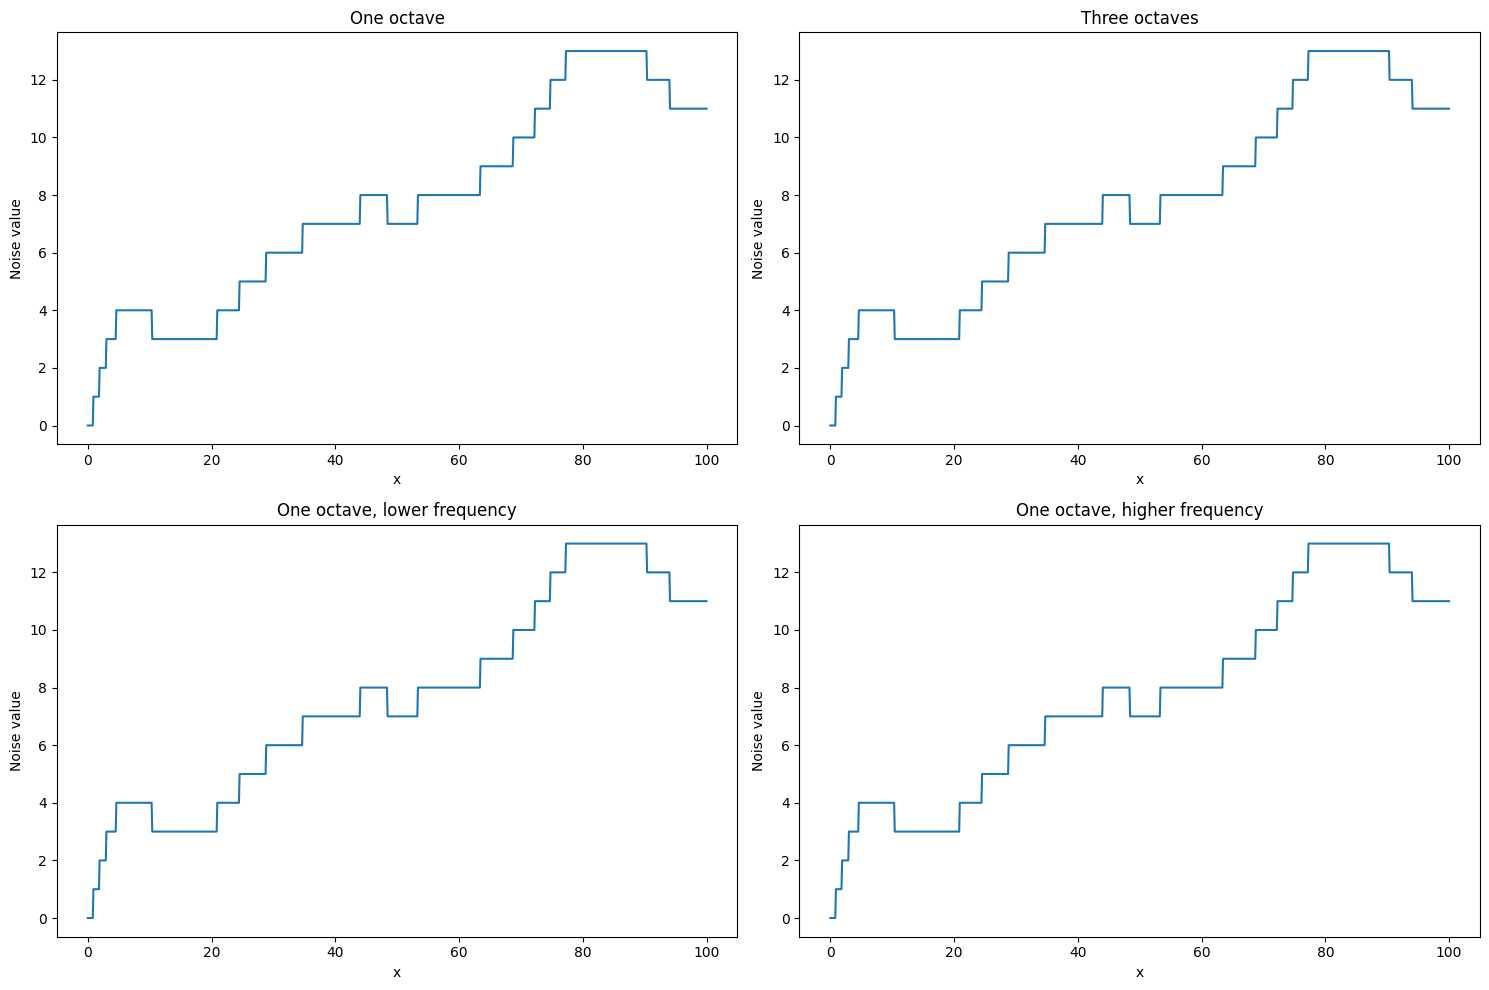

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from perlin import Perlin


def plot_noise(p, x_range, octaves, octave, title):
    y = [p.one_octave(x, octaves, octave) for x in x_range]
    plt.plot(x_range, y)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Noise value")


p = Perlin(402)  # Set a fixed seed for reproducibility
x_range = np.linspace(0, 100, 1000)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plot_noise(p, x_range, 1, 100, "One octave")

plt.subplot(2, 2, 2)
plot_noise(p, x_range, 12, 0.001, "Three octaves")

plt.subplot(2, 2, 3)
plot_noise(p, x_range, 1, 0.001, "One octave, lower frequency")

plt.subplot(2, 2, 4)
plot_noise(p, x_range, 1, 1000000, "One octave, higher frequency")

plt.tight_layout()
plt.show()

In [86]:
import numpy as np

# Original array
arr = np.array(x)

# New range
new_min = -2
new_max = 2

# Min and max of the original array
arr_min = np.min(arr)
arr_max = np.max(arr)

# Apply min-max scaling formula
scaled_arr = new_min + ((arr - arr_min) * (new_max - new_min)) / (arr_max - arr_min)


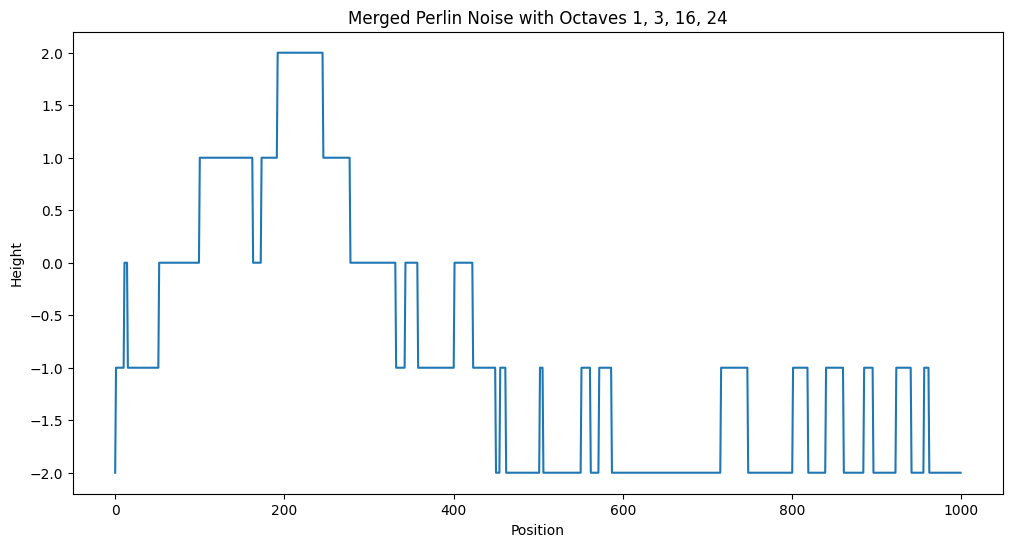

In [87]:
rounded_arr = np.round(scaled_arr, 0)
plt.figure(figsize=(12, 6))
plt.plot(rounded_arr)
plt.title("Merged Perlin Noise with Octaves 1, 3, 16, 24")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [88]:
def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size) / window_size, mode="valid")

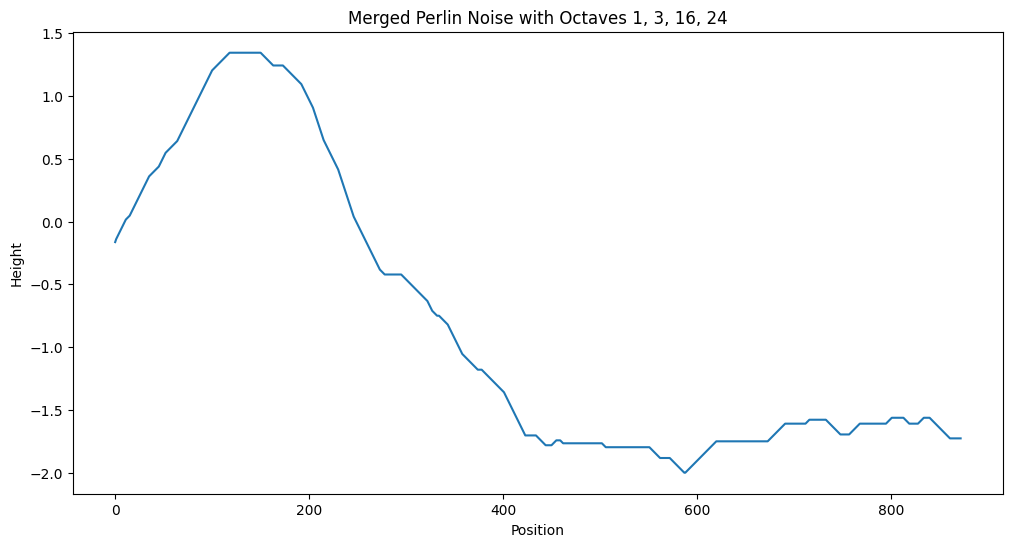

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(moving_average(rounded_arr, 128))
plt.title("Merged Perlin Noise with Octaves 1, 3, 16, 24")
plt.xlabel("Position")
plt.ylabel("Height")
plt.show()

In [ ]:
from perlin2 import Perlin

def generate_noise(p,size,octaves,strength):

    return [
        sum(merge_ratio[j] * p.one_octave(i, octaves[j]) for j in range(len(octaves)))
        for i in range(10000)
    ]


def generate_chunk_biomes(seed=1,no_of_chunks=1000):
    p = Perlin(seed)
    noise = generate_noise()

In [82]:
# Import necessary libraries
import numpy as np
import time

# Define a mock function for p.one_octave (replace this with the actual function)
def one_octave(i, octave):
    # Replace with the actual implementation
    return np.sin(i * octave)  # Example implementation

# Mock data
merge_ratio = [0.4, 0.3, 0.2, 0.1]
octaves = [1, 3, 16, 24]

# Pure Python version
def pure_python_version():
    x = []
    for i in range(1000):
        noise_val = 0
        for j in range(len(octaves)):
            noise_val += merge_ratio[j] * one_octave(i, 1)  # Assuming 1 is a placeholder
        x.append(noise_val)
    return x

# NumPy version
def numpy_version():
    merge_ratio_np = np.array(merge_ratio)
    i_values = np.arange(1000)
    noise_values = np.sum([merge_ratio_np[j] * one_octave(i_values, 1) for j in range(len(octaves))], axis=0)
    return noise_values

# Measure execution time
print("Pure Python version time:")
%timeit pure_python_version()

print("\nNumPy version time:")
%timeit numpy_version()


Pure Python version time:
31.8 ms ± 5.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

NumPy version time:
394 μs ± 32.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
def generate_noise(size, octaves, strength, seed):
    x = []
    for i in range(size):
        noise_val = 0
        for j in range(len(octaves)):

            # Use snoise1 for 1D Simplex noise, which is similar to Perlin noise
            noise_val += noise.pnoise1(
                i / 100.0, octaves=octaves[j], persistence=strength[j]
            )
        x.append(noise_val)
    return x

In [ ]:
generate_noise(1000,)

In [2]:
def assign_biomes(height_map, biomes):
    # Ensure height_map is a NumPy array
    height_map = np.asarray(height_map)

    # Initialize an array to store biome names
    biome_map = np.empty(height_map.shape, dtype=object)

    for i, height in np.ndenumerate(height_map):
        possible_biomes = [
            biome for biome in biomes if biome["y"][0] <= height <= biome["y"][1]
        ]

        if possible_biomes:
            # Randomly choose a biome if there are multiple possibilities
            chosen_biome = random.choice(possible_biomes)
            biome_map[i] = chosen_biome["name"]
        else:
            # Assign a default biome if no match is found
            biome_map[i] = "Unknown"

    return biome_map

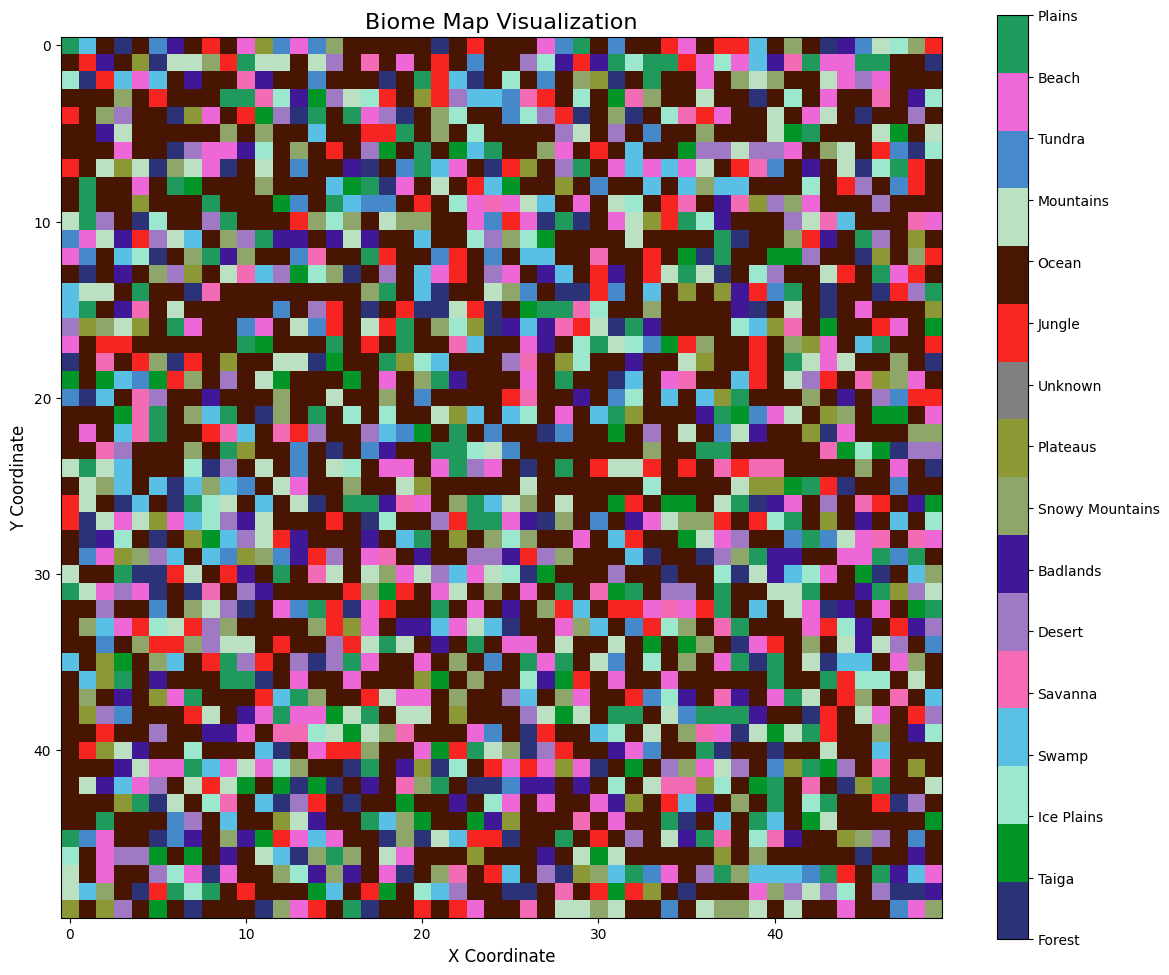

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

biomes = [
    {"name": "Ocean", "octaves": [1, 2], "strengths": [0.5, 0.25], "y": (-1.0, -0.2)},
    {"name": "Beach", "octaves": [1, 2], "strengths": [0.3, 0.2], "y": (-0.3, 0.1)},
    {"name": "Plains", "octaves": [1, 1, 3], "strengths": [2, 2, 1], "y": (-0.2, 0.4)},
    {
        "name": "Forest",
        "octaves": [2, 3, 4],
        "strengths": [1.5, 1, 0.5],
        "y": (0.0, 0.6),
    },
    {
        "name": "Taiga",
        "octaves": [2, 3, 5],
        "strengths": [1.2, 0.8, 0.4],
        "y": (0.3, 0.7),
    },
    {"name": "Swamp", "octaves": [1, 2, 4], "strengths": [1, 1, 0.5], "y": (-0.2, 0.2)},
    {
        "name": "Savanna",
        "octaves": [1, 2, 3],
        "strengths": [1.5, 1, 0.5],
        "y": (0.1, 0.5),
    },
    {"name": "Desert", "octaves": [1, 2], "strengths": [1, 0.5], "y": (-0.1, 0.4)},
    {
        "name": "Badlands",
        "octaves": [3, 4, 5],
        "strengths": [1, 0.7, 0.3],
        "y": (0.2, 0.8),
    },
    {
        "name": "Jungle",
        "octaves": [3, 5, 7],
        "strengths": [1, 0.7, 0.3],
        "y": (0.0, 0.7),
    },
    {
        "name": "Mountains",
        "octaves": [4, 6, 8],
        "strengths": [1, 0.5, 0.25],
        "y": (0.5, 1.0),
    },
    {"name": "Plateaus", "octaves": [2, 3], "strengths": [0.8, 0.4], "y": (0.6, 0.9)},
    {"name": "Tundra", "octaves": [2, 3], "strengths": [1, 0.5], "y": (0.4, 0.8)},
    {
        "name": "Ice Plains",
        "octaves": [1, 2, 3],
        "strengths": [0.7, 0.5, 0.3],
        "y": (0.5, 0.9),
    },
    {
        "name": "Snowy Mountains",
        "octaves": [4, 5, 6],
        "strengths": [0.9, 0.6, 0.3],
        "y": (0.7, 1.0),
    },
]
def visualize_biome_map(biome_map, biomes):
    # Create a color map
    color_map = {}
    for biome in biomes:
        color_map[biome["name"]] = np.random.rand(
            3,
        )
    color_map["Unknown"] = [0.5, 0.5, 0.5]  # Gray for unknown biomes

    # Create a numerical representation of the biome map
    unique_biomes = list(set(biome["name"] for biome in biomes) | {"Unknown"})
    biome_to_num = {biome: i for i, biome in enumerate(unique_biomes)}
    num_map = np.vectorize(lambda x: biome_to_num[x])(biome_map)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(
        num_map,
        cmap=plt.cm.colors.ListedColormap(
            [color_map[biome] for biome in unique_biomes]
        ),
    )

    # Create a color bar
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", aspect=30)
    cbar.set_ticks(range(len(unique_biomes)))
    cbar.set_ticklabels(unique_biomes)

    # Set title and labels
    plt.title("Biome Map Visualization", fontsize=16)
    ax.set_xlabel("X Coordinate", fontsize=12)
    ax.set_ylabel("Y Coordinate", fontsize=12)

    plt.tight_layout()
    plt.show()


# Example usage:
# Assuming we have our biomes list and have generated a biome_map
height_map = np.random.uniform(-1, 1, (50, 50))  # Larger example: 50x50 height map
biome_map = assign_biomes(height_map, biomes)
visualize_biome_map(biome_map, biomes)

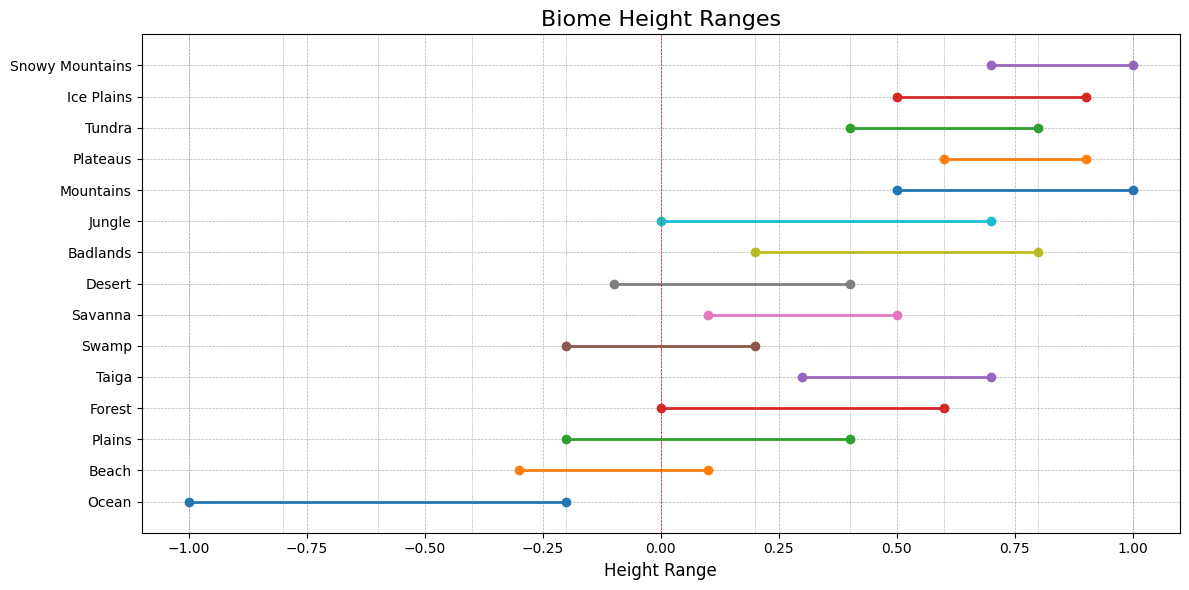

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_biome_heights(biomes):
    fig, ax = plt.subplots(figsize=(12, 6))

    for biome in biomes:
        y_min, y_max = biome["y"]
        ax.plot([y_min, y_max], [biome["name"], biome["name"]], linewidth=2, marker="o")

    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1, len(biomes))
    ax.set_yticks(range(len(biomes)))
    ax.set_yticklabels([biome["name"] for biome in biomes])
    ax.set_xlabel("Height Range", fontsize=12)
    ax.set_title("Biome Height Ranges", fontsize=16)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Add vertical lines for easier reading
    ax.axvline(x=0, color="r", linestyle="--", linewidth=0.5)
    for i in np.arange(-1, 1.1, 0.2):
        ax.axvline(x=i, color="gray", linestyle=":", linewidth=0.5)

    plt.tight_layout()
    plt.show()


# Example usage:
visualize_biome_heights(biomes)

In [14]:
import numpy as np
import noise
import random


class Perlin:
    def __init__(self, seed, octaves=[], strengths=[], initial_size=100):
        np.random.seed(seed)
        random.seed(seed)
        self.i = 0
        self.octaves = octaves
        self.strengths = strengths
        self.world = np.array([])
        self.size = initial_size
        self.base = random.randint(0, 500)

    def generate(self, size):
        x_loc = np.zeros((len(self.octaves), size))

        for j, (octave, s) in enumerate(zip(self.octaves, self.strengths)):
            for k in range(size):
                print((self.i + k) / 100.0)
                x_loc[j, k] = noise.pnoise1(
                    (self.i + k) / 100.0, octaves=octave, persistence=s, base=self.base
                )

        x_loc = x_loc.sum(axis=0)

        self.world = np.concatenate((self.world, x_loc))
        self.i += size
        self.size += size

        return x_loc

    def get_world(self):
        return self.world

    def plot_world(self):
        import matplotlib.pyplot as plt

        plt.figure(figsize=(15, 5))
        plt.plot(self.world)
        plt.title("Generated World Noise")
        plt.xlabel("Position")
        plt.ylabel("Height")
        plt.show()

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.4
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.88
1.89
1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2.0
2.01
2.02
2.03
2

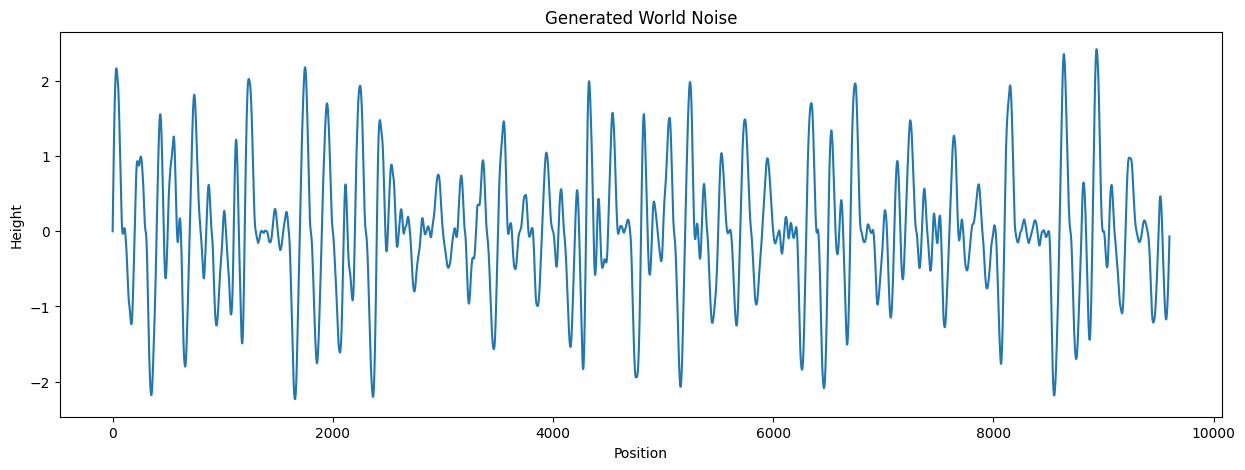

In [17]:
# Initialize the Perlin noise generator
perlin = Perlin(seed=42, octaves=[1, 2, 4], strengths=[1, 0.5, 0.25], initial_size=100)

# Generate initial chunk
initial_chunk = perlin.generate(3200)
print("Initial chunk size:", len(initial_chunk))

# Generate additional chunks
chunk1 = perlin.generate(3200)
chunk2 = perlin.generate(3200)

print("Total world size:", len(perlin.get_world()))

# Plot the entire world
perlin.plot_world()